# Single Model Prelim Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"
model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")

In [3]:
model_results["B_prob"]

0      -65504.0
1      -65504.0
2      -65504.0
3      -65504.0
4      -65504.0
         ...   
1099   -65504.0
1100   -65504.0
1101   -65504.0
1102   -65504.0
1103   -65504.0
Name: B_prob, Length: 1104, dtype: float64

In [4]:
model_results = op.organize_distribution(model_results)
distances = op.calculate_js_distance(model_results)

In [5]:
prompt_distances = op.get_distances_for_prompt_type(distances)

In [6]:
prompt_distances

,mean_distance
prompt_type,
no_or_yes,0.021579
agreement,0.069519
agreement_negation,0.077754
disagreement,0.083270
disagreement_negation,0.089232
options,0.081588
options_flipped,0.053752


In [7]:
item_distances = op.get_distances_for_item(distances)

<Axes: xlabel='title', ylabel='mean_distance'>

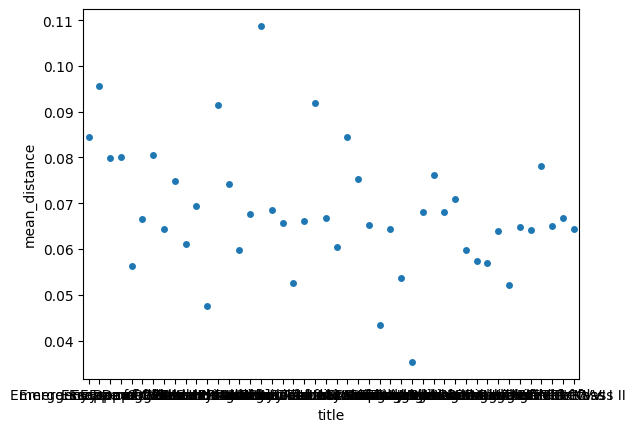

In [8]:
sns.swarmplot(x='title', y='mean_distance', data=item_distances)

# Entropy

In [11]:
model_results.groupby('prompt_type', as_index=False, sort=False).agg({
    "entropy" : ["mean", "std"]
})

prompt_type   entropy          
                              mean       std
0              yes_or_no  0.055351  0.023716
1              no_or_yes  0.086808  0.031091
2              agreement  0.165834  0.056113
3     agreement_negation  0.198175  0.068267
4           disagreement  0.208041  0.063159
5  disagreement_negation  0.218812  0.060631
6                options  0.180472  0.025954
7        options_flipped  0.000233  0.001577

In [14]:
model_results.groupby('title', as_index=False, sort=False).agg({
    "entropy" : ["mean", "std"]
})

,title,entropy
,,entropy
0,Emergency Damages I,2.871733
1,Emergency Damages II,2.851536
2,Escape of Oil I,2.967893
3,Escape of Oil II,2.968737
4,Escape of Water I,3.015618
5,Escape of Water II,2.998030
6,Escape of Water III,2.963761
7,Fire,2.970116
8,Flood I,2.929501


In [16]:
model_results.groupby('title', as_index=False, sort=False).agg({
    "entropy" : [sp.stats.entropy]
})

,title,entropy
,,entropy
0,Emergency Damages I,2.871733
1,Emergency Damages II,2.851536
2,Escape of Oil I,2.967893
3,Escape of Oil II,2.968737
4,Escape of Water I,3.015618
5,Escape of Water II,2.998030
6,Escape of Water III,2.963761
7,Fire,2.970116
8,Flood I,2.929501


# Changes to Probability

<Axes: xlabel='prompt_type', ylabel='Aff_prob'>

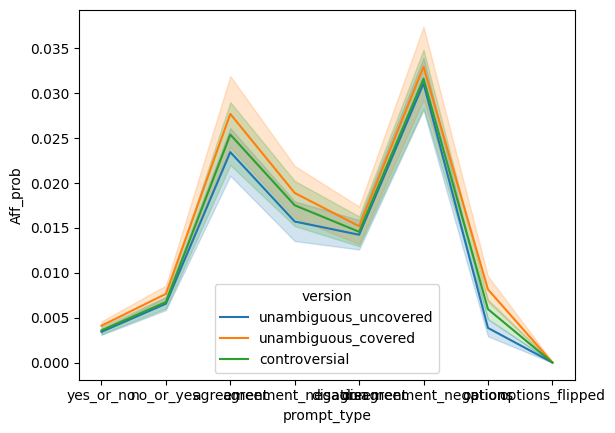

In [22]:
# Variance in Aff probability
sns.lineplot(x='prompt_type', y = 'Aff_prob', hue='version', data=model_results)

<Axes: xlabel='prompt_type', ylabel='UnAff_prob'>

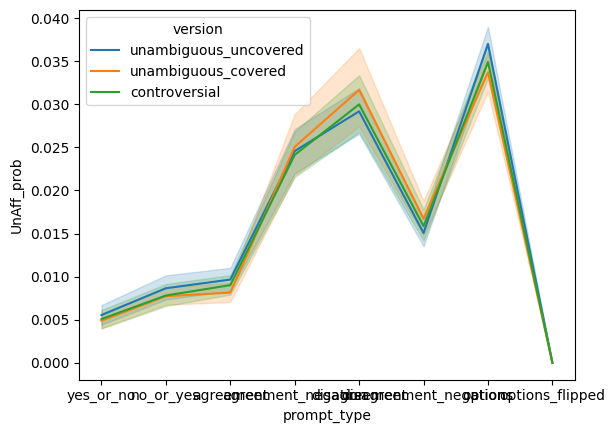

In [23]:
sns.lineplot(x='prompt_type', y = 'UnAff_prob', hue='version', data=model_results)

<Axes: xlabel='prompt_type', ylabel='Other_prob'>

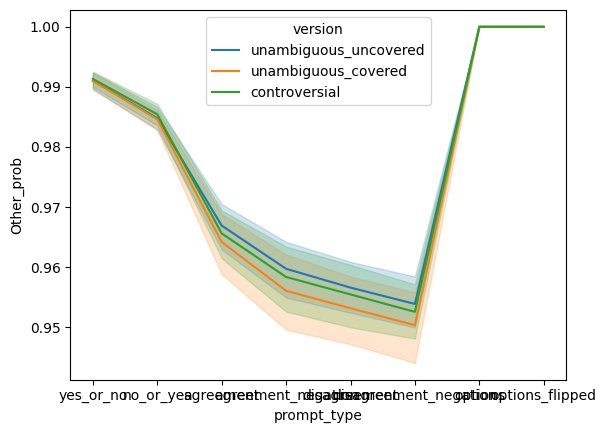

In [24]:
sns.lineplot(x='prompt_type', y = 'Other_prob', hue='version', data=model_results)

# Analysis of Model Results

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op
from functools import reduce
import prompts

In [9]:
models= [
   "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # "gpt2-medium",
    "gpt2-large",
    # "gpt2-xl",
    # "allenai/OLMo-2-0425-1B",
    # "allenai/OLMo-2-0425-1B-Instruct",
    # "allenai/OLMo-2-1124-7B",
    # "allenai/OLMo-2-1124-7B-Instruct",
    # "ministral/Ministral-3b-instruct",
    # "ministral/Ministral-4b-instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    # "google/gemma-3-1b-it",
    # "google/gemma-3-4b-it",
    # "google/gemma-7b-it"
]
def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-1001-05_19/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in models]
combined_df = pd.concat(combined_results).reset_index()
combined_df.shape

(9936, 17)

# Answer Choice

In [10]:
np.sum(combined_df["Aff_prob"] > combined_df["UnAff_prob"])/combined_df.shape[0]

np.float64(0.5341183574879227)

In [11]:
combined_df["Covered"] = combined_df["Aff_prob"] > combined_df["UnAff_prob"]
combined_df["NotCovered"] = combined_df["Aff_prob"] <= combined_df["UnAff_prob"]
np.sum(combined_df["Covered"]), np.sum(combined_df["NotCovered"]), combined_df.shape[0]

(np.int64(5307), np.int64(4629), 9936)

In [12]:
combined_df.groupby(['prompt_type'], as_index=False, sort=False).apply(lambda x: x.Covered.sum()) 

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_63592/3110038544.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df.groupby(['prompt_type'], as_index=False, sort=False).apply(lambda x: x.Covered.sum())


,prompt_type,None
0,yes_or_no,678
1,no_or_yes,369
2,negation,330
3,agreement,910
4,agreement_negation,778
5,disagreement,413
6,disagreement_negation,358
7,options,559
8,options_flipped,912


In [16]:
prompt_type_model_proportions = combined_df.groupby(['prompt_type', 'model_name'], as_index=False, sort=False)\
.agg({"Covered" : "sum", "NotCovered": "sum"})
prompt_type_model_proportions

,prompt_type,model_name,Covered,NotCovered
0,yes_or_no,Llama-3.2-1B,138,0
1,no_or_yes,Llama-3.2-1B,16,122
2,negation,Llama-3.2-1B,0,138
3,agreement,Llama-3.2-1B,138,0
4,agreement_negation,Llama-3.2-1B,0,138
...,...,...,...,...
67,agreement_negation,Ministral-8B-Instruct-2410,138,0
68,disagreement,Ministral-8B-Instruct-2410,136,2
69,disagreement_negation,Ministral-8B-Instruct-2410,0,138
70,options,Ministral-8B-Instruct-2410,0,138


/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_63592/223679583.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[100.          11.5942029    0.         100.           0.
   0.         100.         100.          94.20289855 100.
   0.           0.         100.          97.82608696   5.79710145
   5.07246377  57.97101449 100.         100.          97.10144928
   0.         100.         100.           0.           1.44927536
  73.1884058   98.55072464  15.94202899   0.          86.95652174
  72.46376812 100.          78.98550725   0.72463768   0.
  97.82608696  49.27536232  29.71014493  63.76811594 100.
  10.14492754   0.          97.10144928  73.91304348  94.92753623
   0.           0.          71.73913043  84.7826087   81.88405797
  39.13043478  51.44927536   0.          71.73913043  99.27536232
  90.57971014   0.          81.88405797  73.91304348  76.8115942
   3.62318841 100.          40.57971014  2

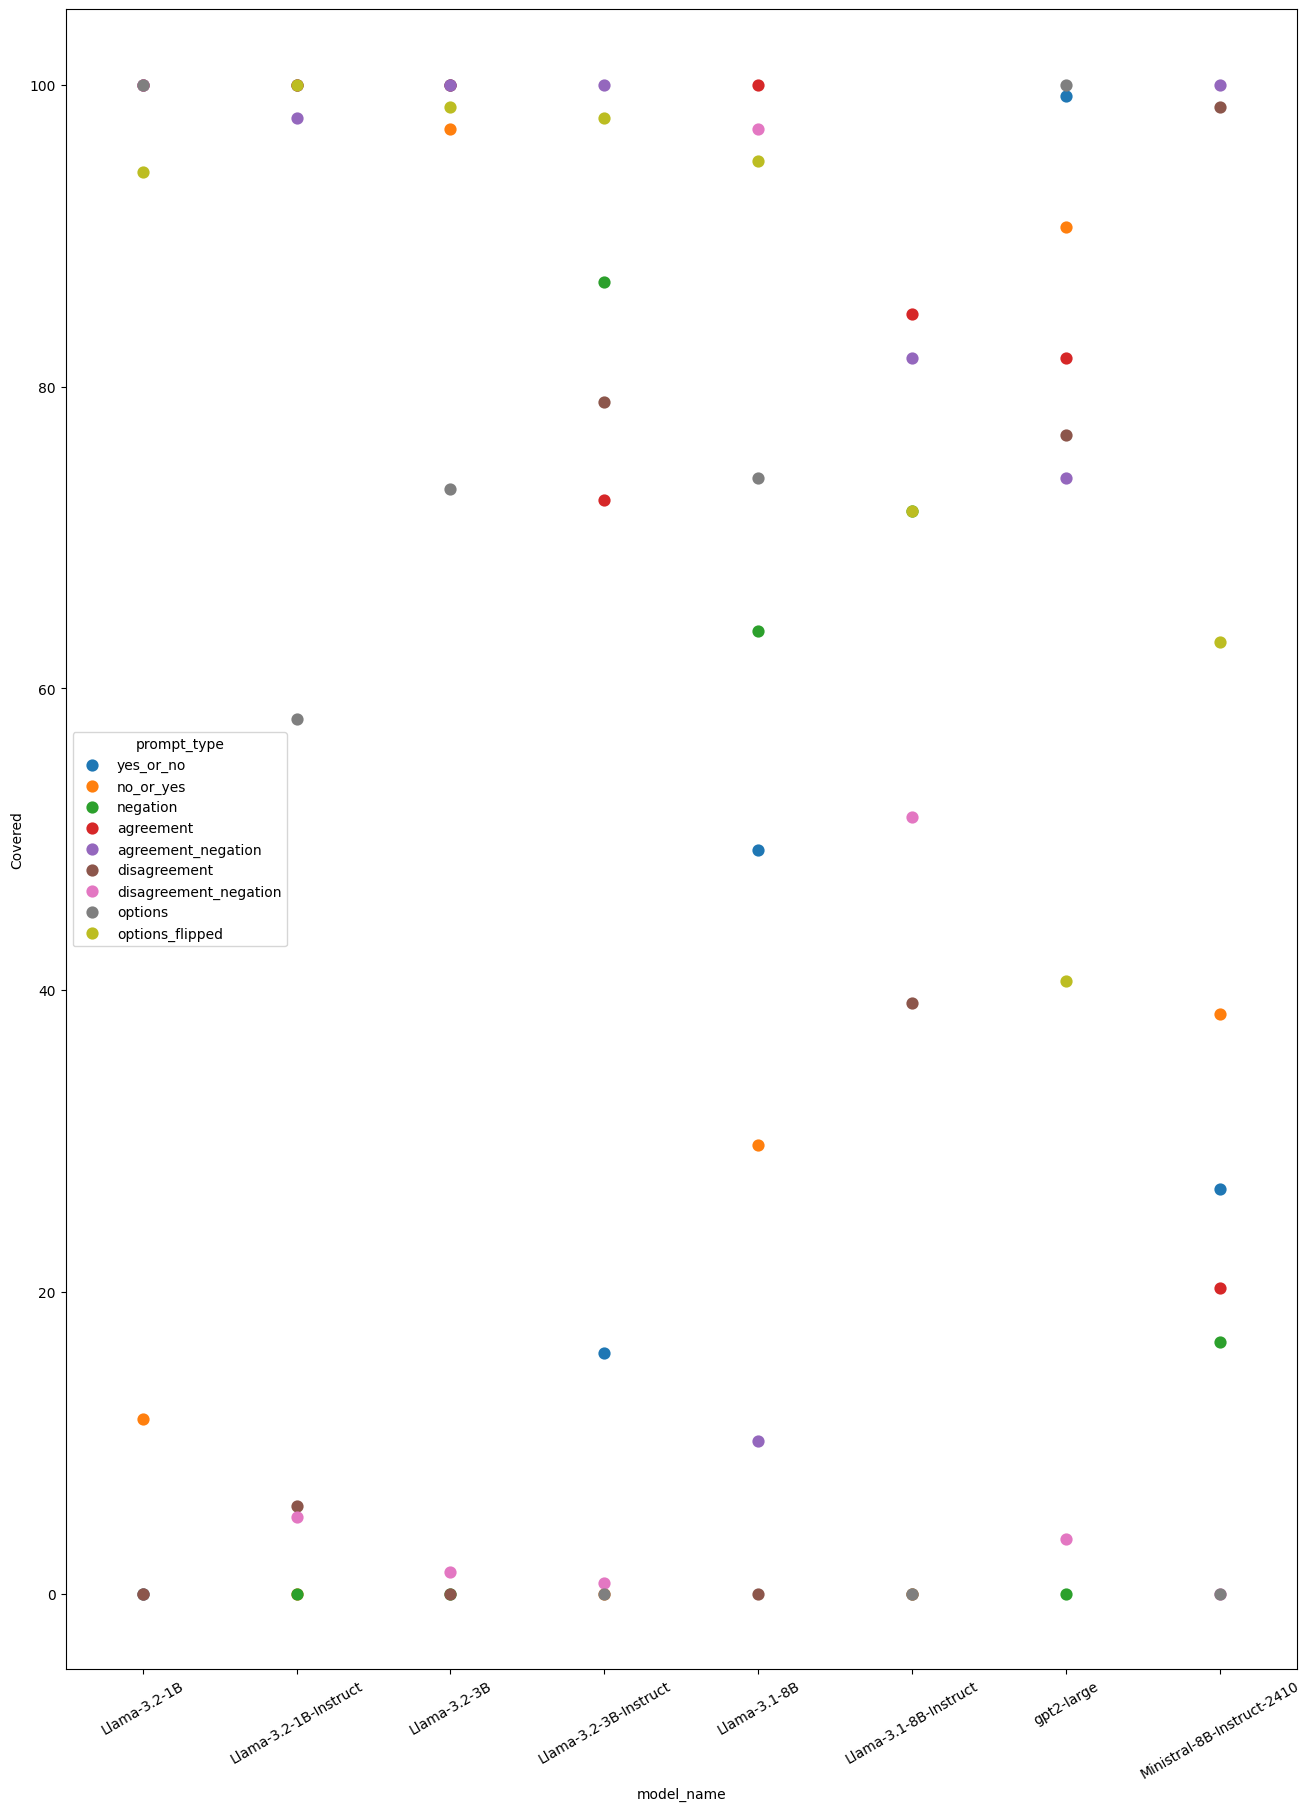

In [17]:
VAGUE_CONTRACTS_SIZE=138
prompt_type_model_proportions.loc[:, ["Covered", "NotCovered"]] = prompt_type_model_proportions[["Covered", "NotCovered"]] * 100/138
fig, ax = plt.subplots(1,1, figsize=(13,18), layout='constrained')
plt.xticks(rotation=30)
point_plot = sns.pointplot(
    data = prompt_type_model_proportions,
    x='model_name',
    y='Covered',
    hue='prompt_type',
    linestyle="None"
)
fig = point_plot.get_figure()
fig.savefig("fig-covered-count-models.pdf", format="pdf")

In [19]:
prompt_type_model_proportions.Covered.value_counts()

Covered
0.000000      16
100.000000    14
97.826087      2
73.913043      2
98.550725      2
97.101449      2
81.884058      2
71.739130      2
11.594203      1
94.202899      1
5.797101       1
73.188406      1
1.449275       1
57.971014      1
86.956522      1
72.463768      1
0.724638       1
78.985507      1
49.275362      1
29.710145      1
15.942029      1
5.072464       1
10.144928      1
63.768116      1
94.927536      1
84.782609      1
39.130435      1
51.449275      1
99.275362      1
90.579710      1
76.811594      1
3.623188       1
40.579710      1
26.811594      1
38.405797      1
16.666667      1
20.289855      1
63.043478      1
Name: count, dtype: int64

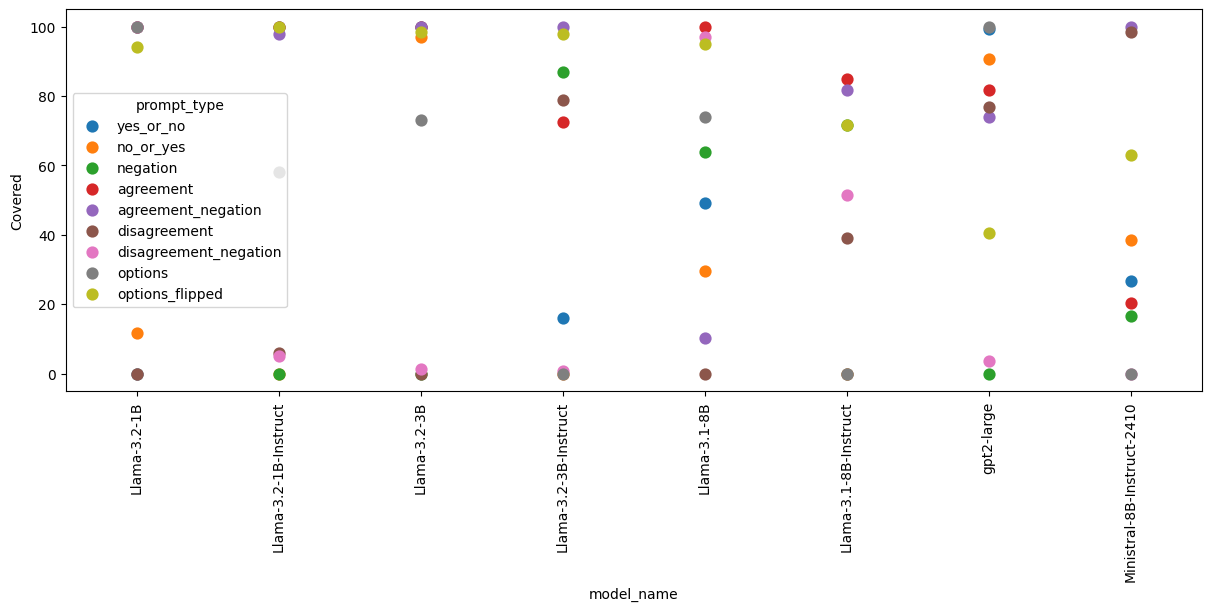

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=90)
# plt.set_ylim((0, 138))
point_plot = sns.pointplot(
    data = prompt_type_model_proportions,
    x='model_name',
    y='Covered',
    hue='prompt_type',
    linestyle="None"
)
fig = point_plot.get_figure()
fig.savefig("fig-covered-by-model-and-prompts.pdf", format="pdf")

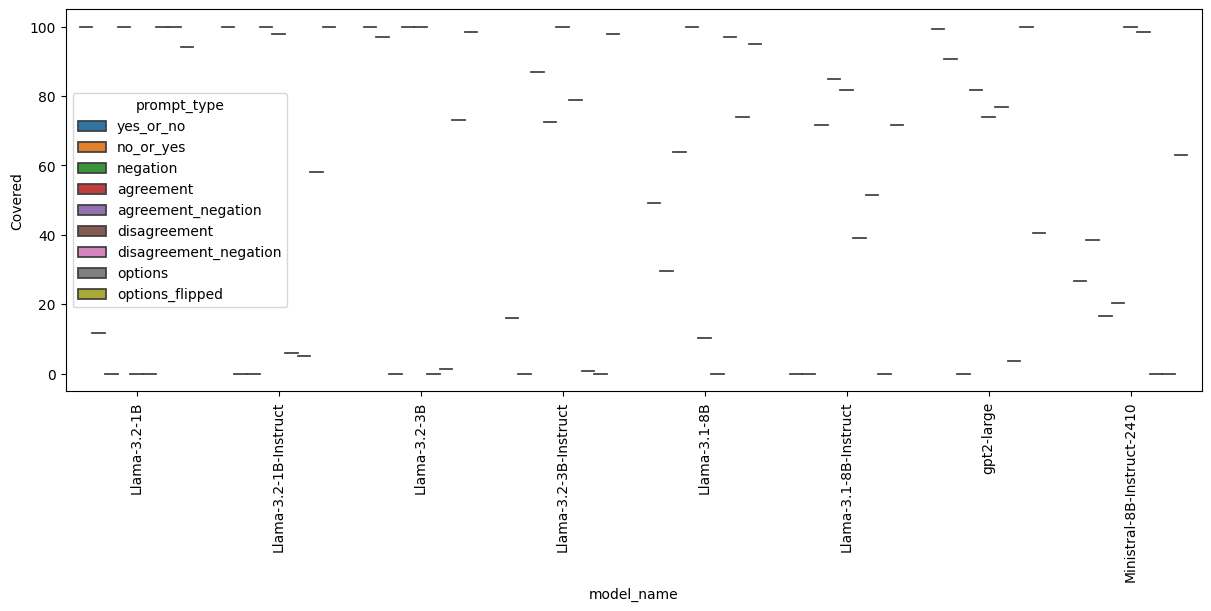

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=90)
# plt.set_ylim((0, 138))
point_plot = sns.violinplot(
    data = prompt_type_model_proportions,
    x='model_name',
    y='Covered',
    hue='prompt_type',
    linestyle="None"
)
fig = point_plot.get_figure()
fig.savefig("fig-covered-by-model-and-prompts.pdf", format="pdf")

In [32]:
item_responses = combined_df.groupby(['title', 'model_name'], as_index=False, sort=False)\
.agg({"Covered" : "sum", "NotCovered": "sum"})
item_responses 

,title,model_name,Covered,NotCovered
0,Emergency Damages I,Llama-3.2-1B,15,12
1,Emergency Damages II,Llama-3.2-1B,15,12
2,Escape of Oil I,Llama-3.2-1B,15,12
3,Escape of Oil II,Llama-3.2-1B,12,15
4,Escape of Water I,Llama-3.2-1B,15,12
...,...,...,...,...
363,Vehicle Theft IV,Ministral-8B-Instruct-2410,12,15
364,Vehicle Theft V,Ministral-8B-Instruct-2410,6,21
365,Vehicle Theft VI,Ministral-8B-Instruct-2410,8,19
366,Vehicle Glass I,Ministral-8B-Instruct-2410,11,16


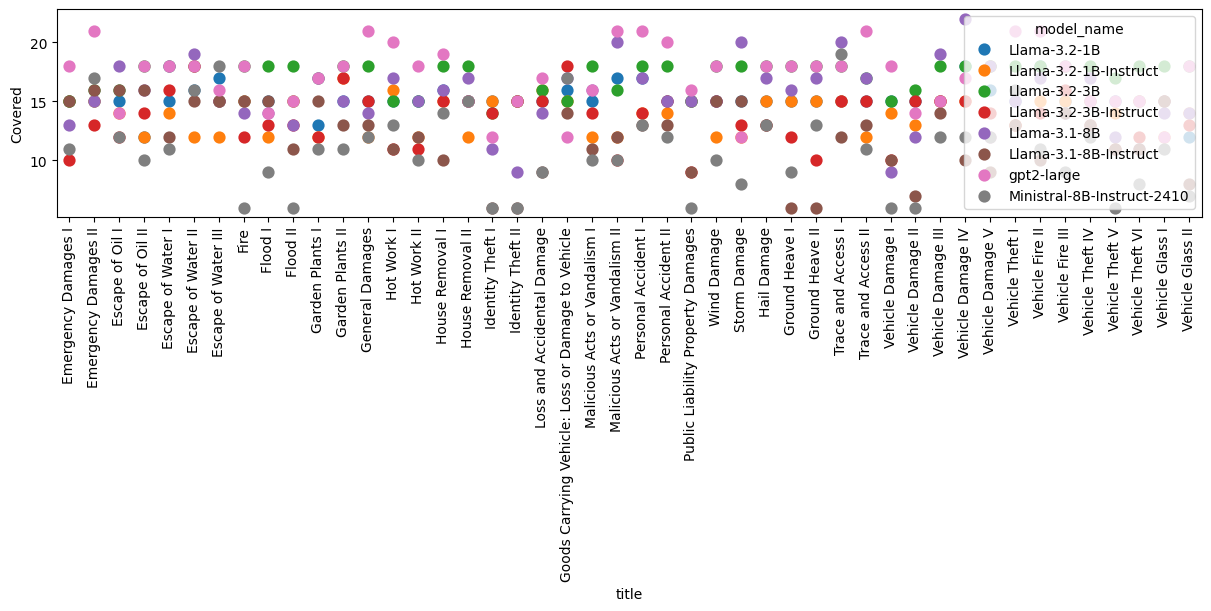

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=90)
# plt.set_ylim((0, 138))
point_plot = sns.pointplot(
    data = item_response,
    x='title',
    y='Covered',
    hue='title',
    linestyle="None"
)
fig = point_plot.get_figure()
fig.savefig("fig-covered-count-prompt-types.pdf", format="pdf")

In [5]:
def calculate_model_js_distance(model_results, model_name):
    distances = op.calculate_js_distance(model_results)
    distances["model_name"] = model_name
    return distances

In [6]:
control_prompt_mask = combined_df["prompt_type"] == "yes_or_no"
control_df = combined_df[control_prompt_mask]
reversal_df = combined_df[control_prompt_mask][["title", "version", "prompt_type", "model_name"]].copy()
reversal_probs = combined_df[control_prompt_mask][["UnAff_prob", "Aff_prob", "Other_prob"]]
control_probs = combined_df[control_prompt_mask][["Aff_prob", "UnAff_prob", "Other_prob"]]
reversal_df["prompt_type"] = "reversal"
reversal_df["js_dist"] = np.array([sp.spatial.distance.jensenshannon(x, y) for x, y in zip(control_probs.values, reversal_probs.values)])
all_distances = pd.concat([calculate_model_js_distance(results, model_name.split("/")[-1]) for model_name, results in zip(models, combined_results)]).reset_index()

In [7]:
all_distances.shape

(12144, 7)

In [84]:
control_prompt_mask = combined_df["prompt_type"] == "yes_or_no"
control_df = combined_df[control_prompt_mask]
control_df.shape, reversal_df.shape

((2070, 17), (2070, 5))

In [85]:
reversal_sums = all_distances.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).agg({"more_than_reversal": "sum"})
reversal_sums.groupby('model_name', as_index=False, sort=False).agg({"more_than_reversal": 'sum'})

,model_name,more_than_reversal
0,Llama-3.2-1B,460.0
1,Llama-3.2-1B-Instruct,17.0
2,Llama-3.2-3B,160.0
3,Llama-3.2-3B-Instruct,838.0
4,Llama-3.1-8B,944.0
5,Llama-3.1-8B-Instruct,199.0
6,gpt2-medium,805.0
7,gpt2-large,350.0
8,gpt2-xl,945.0
9,OLMo-2-0425-1B,848.0


In [86]:
all_distances.groupby(['model_name'], as_index=False, sort=False).agg({"js_dist": "mean"})

,model_name,js_dist
0,Llama-3.2-1B,0.172040
1,Llama-3.2-1B-Instruct,0.265191
2,Llama-3.2-3B,0.162331
3,Llama-3.2-3B-Instruct,0.210090
4,Llama-3.1-8B,0.082755
5,Llama-3.1-8B-Instruct,0.178282
6,gpt2-medium,0.139261
7,gpt2-large,0.116326
8,gpt2-xl,0.101721
9,OLMo-2-0425-1B,0.223062


In [87]:
reversal_sums.groupby('prompt_type', as_index=False, sort=False).agg({"more_than_reversal": 'sum'})

,prompt_type,more_than_reversal
0,no_or_yes,609.0
1,negation,1211.0
2,agreement,892.0
3,agreement_negation,1339.0
4,disagreement,1276.0
5,disagreement_negation,953.0
6,options,1172.0
7,options_flipped,1066.0


In [88]:
(reversal_sums.pivot(index="model_name", columns="prompt_type").round(2))

more_than_reversal                                  \
prompt_type                         agreement agreement_negation disagreement   
model_name                                                                      
Llama-3.1-8B                            137.0              113.0        133.0   
Llama-3.1-8B-Instruct                    39.0               14.0          1.0   
Llama-3.2-1B                             56.0              112.0        132.0   
Llama-3.2-1B-Instruct                     0.0                0.0          0.0   
Llama-3.2-3B                              4.0                1.0         68.0   
Llama-3.2-3B-Instruct                   105.0              132.0        101.0   
Ministral-3b-instruct                     0.0              138.0        121.0   
Ministral-4b-instruct                     0.0              129.0         91.0   
Ministral-8B-Instruct-2410               38.0               76.0         72.0   
OLMo-2-0425-1B                           59.0              133.0         97.0   
OLMo-2-0425-1B-Instruct                  80.0               90.0         56.0   
gemma-3-1b-it                           103.0              107.0        109.0   
gpt2-large                               25.0               18.0         33.0   
gpt2-medium                             131.0              138.0        138.0   
gpt2-xl                                 115.0              138.0        124.0   

                                                                             \
prompt_type                disagreement_negation negation no_or_yes options   
model_name                                                                    
Llama-3.1-8B                               114.0    100.0      95.0   131.0   
Llama-3.1-8B-Instruct                        8.0      3.0       4.0    60.0   
Llama-3.2-1B                                37.0    107.0       2.0     5.0   
Llama-3.2-1B-Instruct                        0.0      0.0      17.0     0.0   
Llama-3.2-3B                                 6.0     71.0       0.0     9.0   
Llama-3.2-3B-Instruct                       89.0     60.0      92.0   129.0   
Ministral-3b-instruct                        0.0    118.0       0.0     0.0   
Ministral-4b-instruct                        0.0    138.0       0.0    63.0   
Ministral-8B-Instruct-2410                  67.0     34.0      31.0   135.0   
OLMo-2-0425-1B                              90.0    126.0      67.0   138.0   
OLMo-2-0425-1B-Instruct                    116.0     63.0      52.0   121.0   
gemma-3-1b-it                              111.0    105.0     115.0   107.0   
gpt2-large                                  65.0    138.0       6.0    38.0   
gpt2-medium                                137.0     79.0       0.0    98.0   
gpt2-xl                                    113.0     69.0     128.0   138.0   

                                            
prompt_type                options_flipped  
model_name                                  
Llama-3.1-8B                         121.0  
Llama-3.1-8B-Instruct                 70.0  
Llama-3.2-1B                           9.0  
Llama-3.2-1B-Instruct                  0.0  
Llama-3.2-3B                           1.0  
Llama-3.2-3B-Instruct                130.0  
Ministral-3b-instruct                  0.0  
Ministral-4b-instruct                  2.0  
Ministral-8B-Instruct-2410           104.0  
OLMo-2-0425-1B                       138.0  
OLMo-2-0425-1B-Instruct              135.0  
gemma-3-1b-it                        125.0  
gpt2-large                            27.0  
gpt2-medium                           84.0  
gpt2-xl                              120.0

In [92]:
all_distances = pd.concat([all_distances, reversal_df]).reset_index()

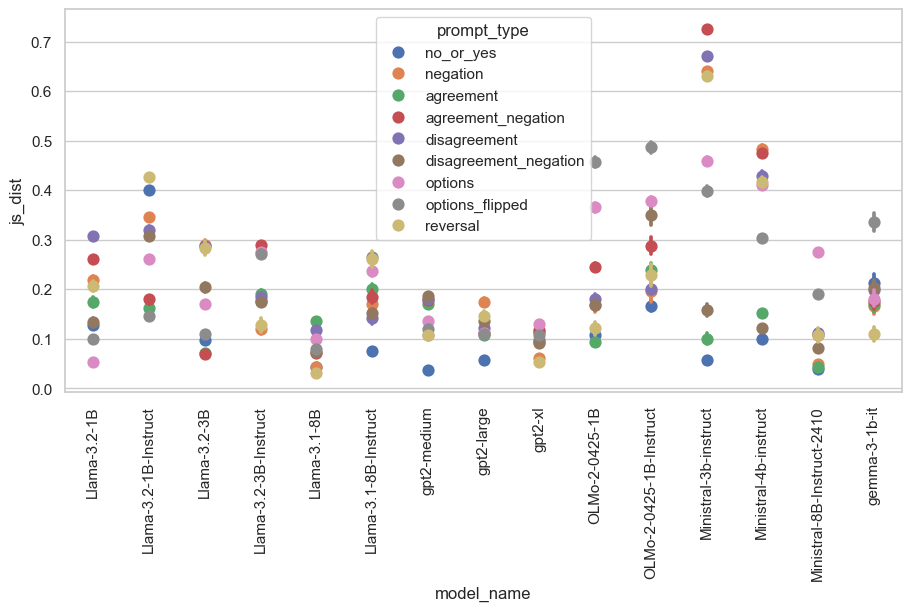

In [181]:
fig, ax = plt.subplots(1,1, figsize=(9,6), layout='constrained')
plt.xticks(rotation=90)
dist_plot_for_models = sns.pointplot(
    data=all_distances, x='model_name', y ='js_dist', hue='prompt_type', linestyle='None')
fig = dist_plot_for_models.get_figure()
fig.savefig("fig-distance-mean-models.pdf", format="pdf")

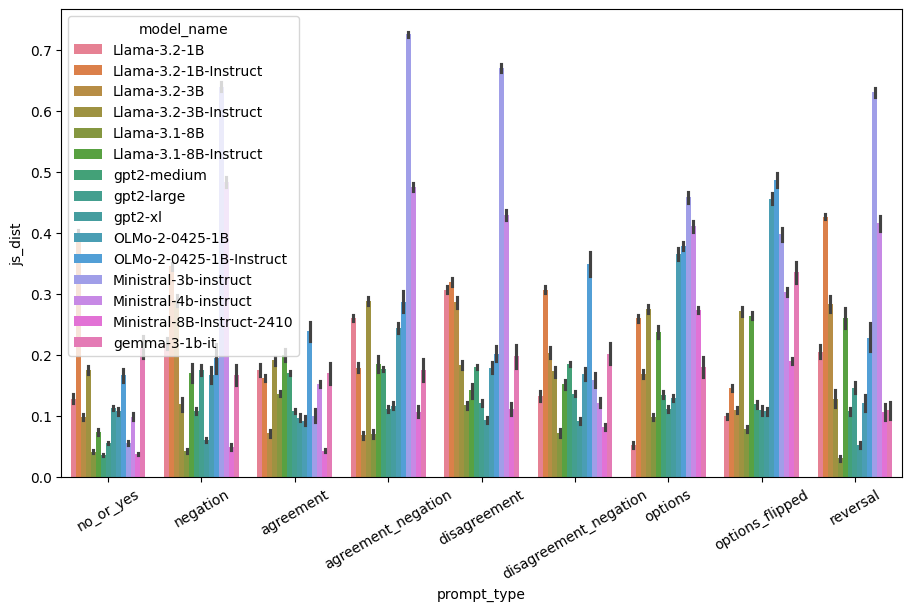

In [94]:
fig, ax = plt.subplots(1,1, figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
dist_plot_for_models = sns.barplot(
    data=all_distances, x='prompt_type', y ='js_dist', hue='model_name')
fig = dist_plot_for_models.get_figure()

In [96]:
# all_distances.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).agg(

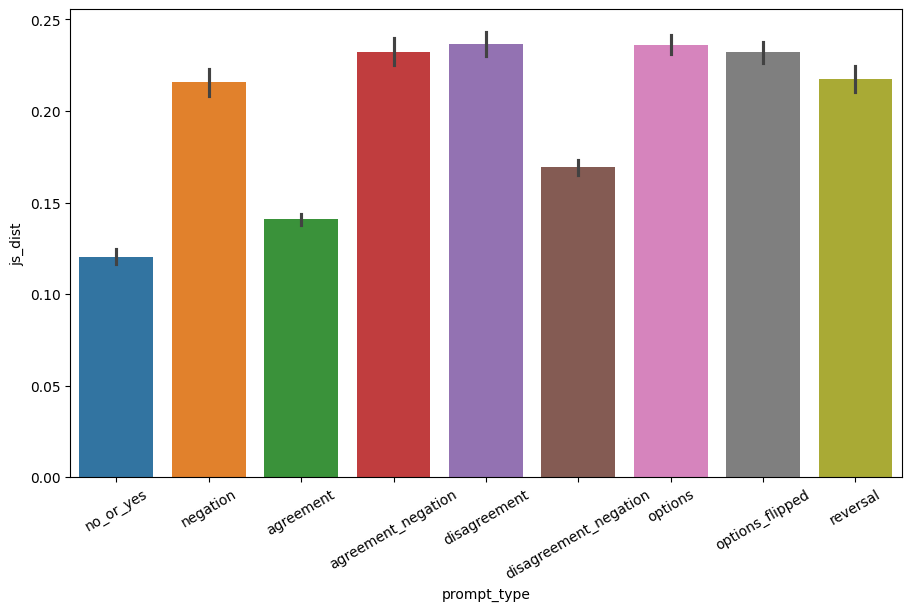

In [97]:
fig, ax = plt.subplots(1,1, figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
dist_plot_for_models = sns.barplot(
    data=all_distances, x='prompt_type', y ='js_dist', hue='prompt_type')

<Axes: xlabel='model_name', ylabel='js_dist'>

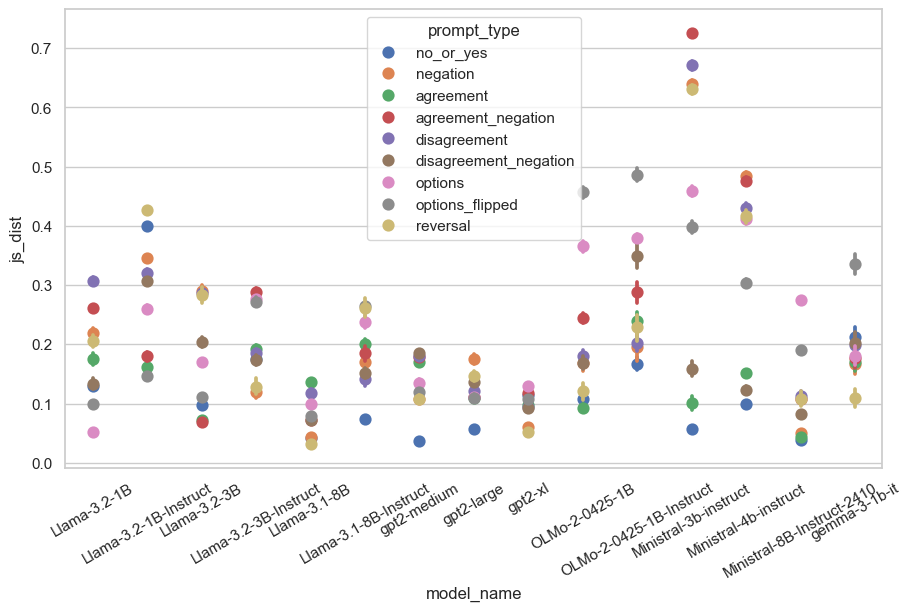

In [180]:
fig, ax = plt.subplots(1,1, figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.pointplot(
    x = 'model_name', 
    y = 'js_dist',
    hue='prompt_type',
    data=all_distances,
    linestyle="None",
    ax = ax
)

In [100]:
# all_distances.groupby('model_name

In [101]:
dist_for_models = all_distances.groupby('model_name', as_index=False, sort=False).agg(
    {"js_dist" : ["mean"]}
)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.barplot(data=dist_for_models, x='model_name', y=('js_dist', 'mean'), hue='model_name')

In [103]:
control_prob_diff = control_df["Aff_prob"] - control_df["UnAff_prob"]
combined_prob_df = combined_df["Aff_prob"] - combined_df["UnAff_prob"]
control_prob_diff.mean(), combined_prob_df.mean()

(np.float64(-0.03235831816009669), np.float64(0.024496867995095126))

In [104]:
dist_for_item = all_distances.groupby(['title'], as_index=False, sort=False).agg(
    {
        "js_dist" : ["mean"]
    }
)

<Axes: xlabel='title', ylabel="('js_dist', 'mean')">

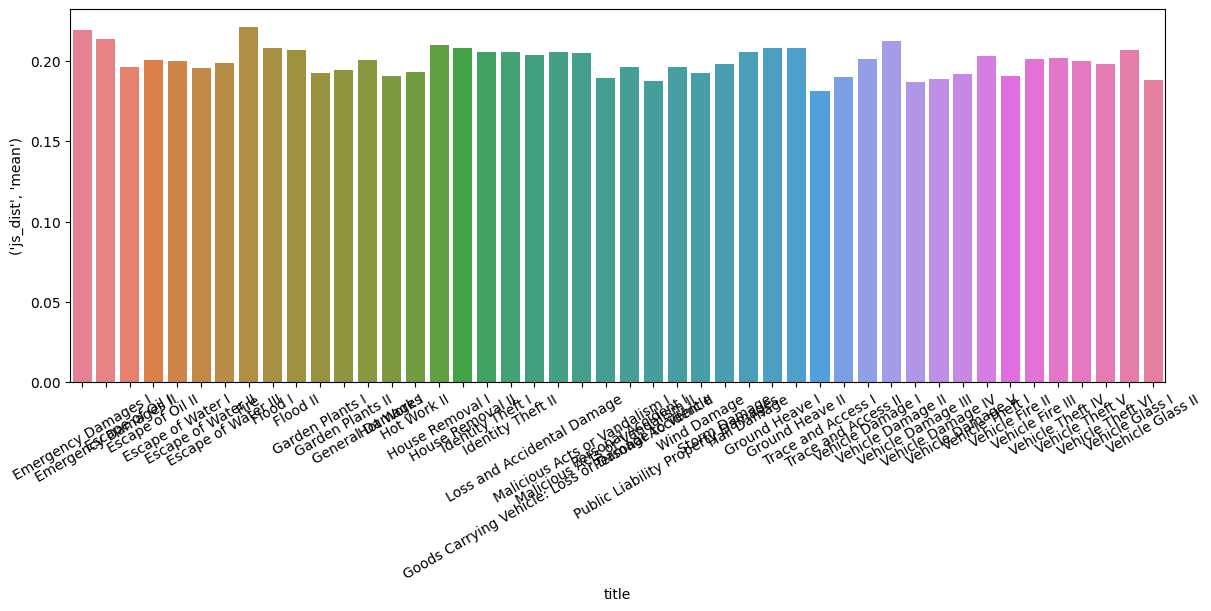

In [105]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
sns.barplot(y=('js_dist', 'mean'),  x= 'title', hue='title', data=dist_for_item, ax=ax)

In [106]:
dist_for_items_by_versions = all_distances.groupby(['title', 'version'], as_index=False, sort=False).agg(
    {
        "js_dist" : "mean"
    }
)

ValueError: Length of tuple vectors must match length of `data` when both are used, but `data` has length 138 and the vector passed to `y` has length 2.

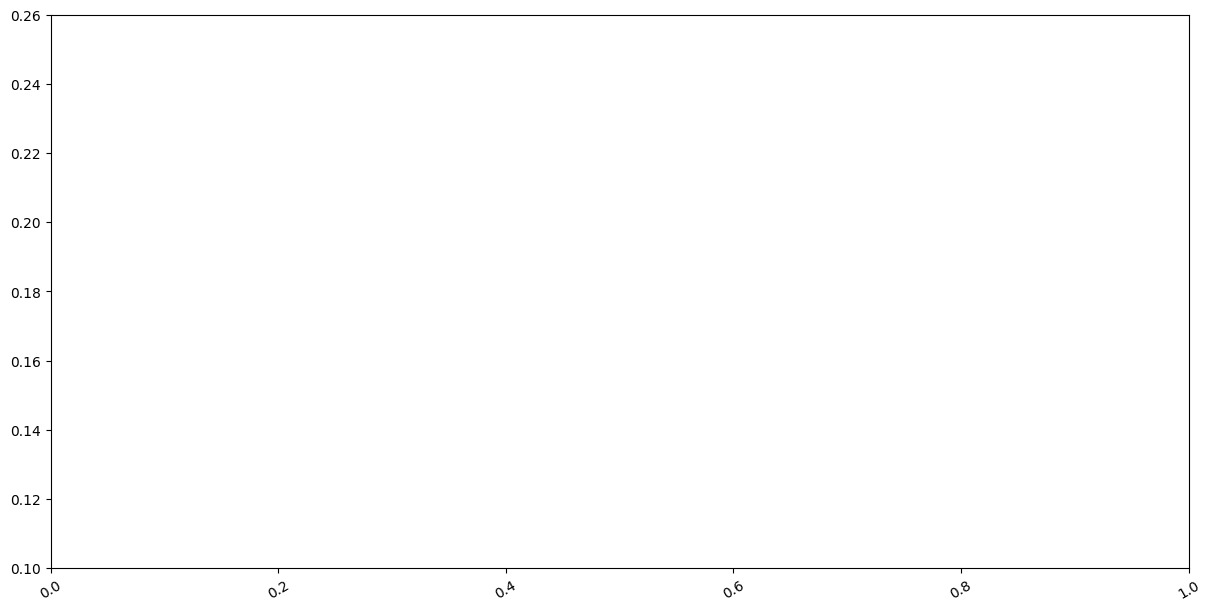

In [107]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
ax.set_ylim((0.1, 0.26))
sns.barplot(y=('js_dist', 'mean'), x = 'title', hue='version', data=dist_for_items_by_versions, ax=ax)

In [108]:
distances_by_version = all_distances.groupby(['version'], as_index=False, sort=False).agg(
    {'js_dist': 'mean'}    
)

<Axes: xlabel='version', ylabel='js_dist'>

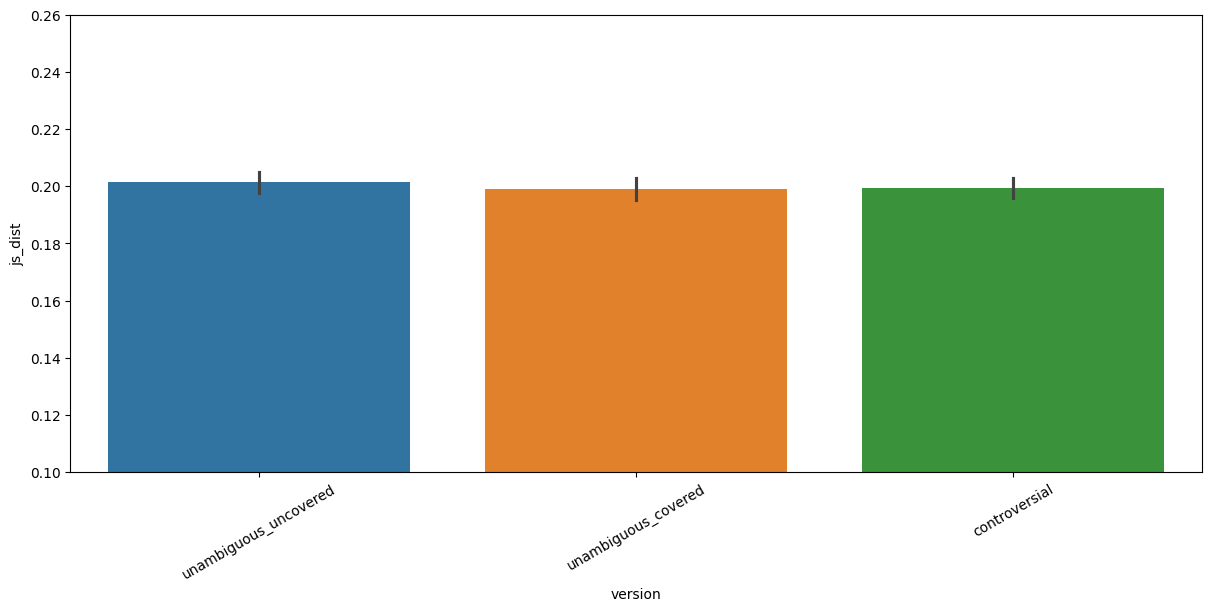

In [109]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
ax.set_ylim((0.1, 0.26))
sns.barplot(y='js_dist', x = 'version', hue='version', data=all_distances, ax=ax)

In [110]:
distances_by_models_for_version = all_distances.groupby(['version', 'model_name'], as_index=False, sort=False).agg(
    {'js_dist': 'mean'}    
)

<Axes: xlabel='version', ylabel='js_dist'>

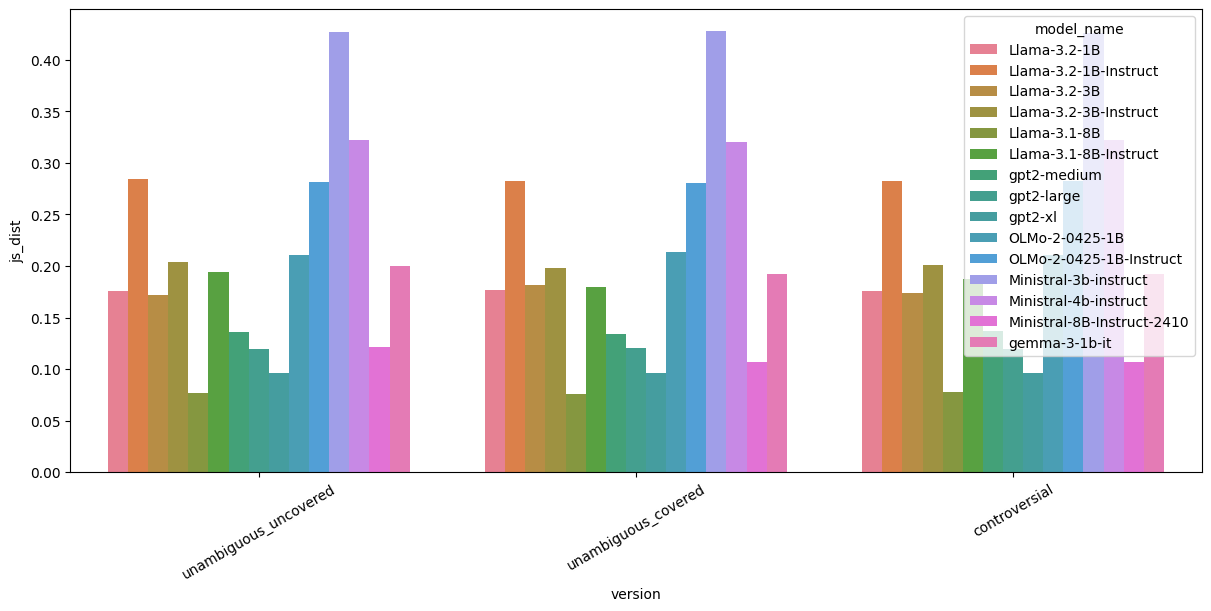

In [111]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
# ax.set_ylim((0, ))
sns.barplot(y='js_dist', x = 'version', hue='model_name', data=distances_by_models_for_version, ax=ax)

# Entropy of the output dist

In [23]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_probs,No_probs,A_probs,B_probs,Other_prob,Aff_prob,UnAff_prob,entropy,model_name
8075,623,Personal Accident I,agreement_negation,Gwen's car insurance policy includes coverage ...,controversial,Yes,Yes.,NaN,0.188944,0.692732,0.00044,0.000269,0.118324,0.692732,0.188944,0.821691,allenai/OLMo-2-1124-7B


<Axes: xlabel='prompt_type', ylabel='entropy'>

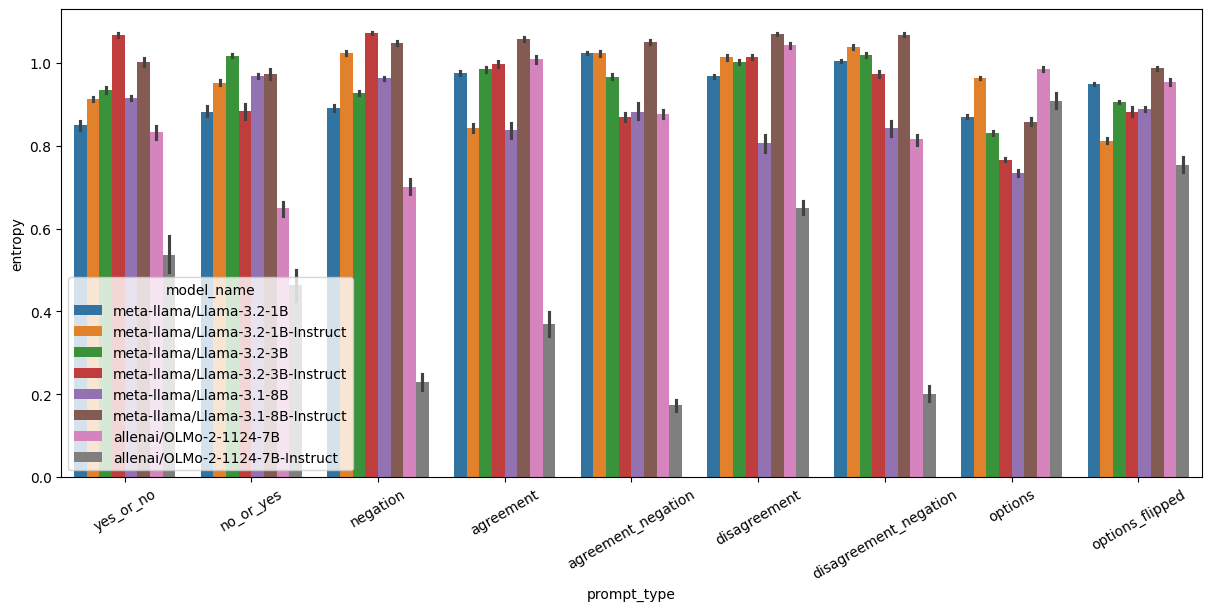

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
sns.barplot(x='prompt_type', y='entropy', hue='model_name', data=combined_df)

<Axes: xlabel='prompt_type', ylabel='value'>

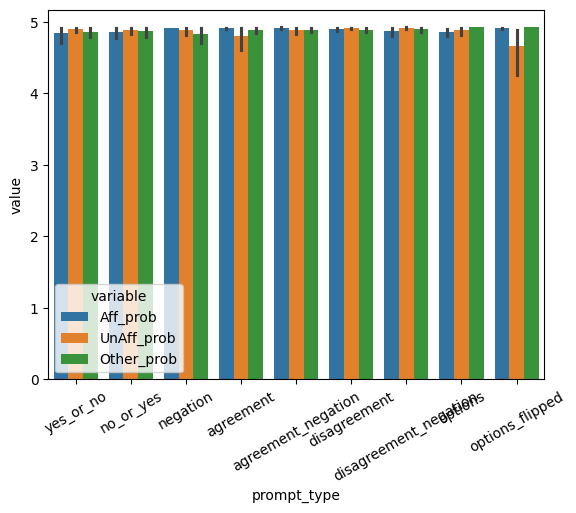

In [25]:
res = combined_df.groupby(['prompt_type', 'model_name'], as_index=False, sort=False).agg(
    {
        "Aff_prob" : sp.stats.entropy,
        "UnAff_prob" : sp.stats.entropy,
        "Other_prob" : sp.stats.entropy
    }
)
res.columns = list(map(''.join, res.columns.values))
res = res.melt(id_vars=["prompt_type", "model_name"])\
    .groupby(['prompt_type', 'model_name', 'variable'], as_index=False, sort=False)\
    .agg({'value': 'mean'})
res

plt.xticks(rotation=30)
sns.barplot(data=res, x='prompt_type', y='value', hue='variable')

In [26]:
combined_df.groupby(['prompt_type', 'model_name'], as_index=False, sort=False).agg(
    {
        "Aff_prob" : 'mean',
        "UnAff_prob" : 'mean',
        "Other_prob" : 'mean',
    }
)

,prompt_type,model_name,Aff_prob,UnAff_prob,Other_prob
0,yes_or_no,meta-llama/Llama-3.2-1B,0.268437,0.093775,0.637788
1,no_or_yes,meta-llama/Llama-3.2-1B,0.156100,0.196423,0.647476
2,negation,meta-llama/Llama-3.2-1B,0.100638,0.300322,0.599041
3,agreement,meta-llama/Llama-3.2-1B,0.474938,0.126860,0.398202
4,agreement_negation,meta-llama/Llama-3.2-1B,0.169918,0.394347,0.435735
...,...,...,...,...,...
67,agreement_negation,allenai/OLMo-2-1124-7B-Instruct,0.959934,0.035693,0.004374
68,disagreement,allenai/OLMo-2-1124-7B-Instruct,0.368280,0.615731,0.015988
69,disagreement_negation,allenai/OLMo-2-1124-7B-Instruct,0.045850,0.949318,0.004833
70,options,allenai/OLMo-2-1124-7B-Instruct,0.547678,0.412162,0.999992


In [27]:
# # Normalized probability between two choices
# def normalize_probs(x, y):
#     total = x + y 
#     return x/total, y/total
# choice_total_probs = combined_df["Aff_prob"] + combined_df["UnAff_prob"]
# combined_df["Aff_prob"] = combined_df["Aff_prob"]/choice_total_probs
# combined_df["UnAff_prob"] = combined_df["UnAff_prob"]/choice_total_probs

In [28]:
combined_df["entropy"] = combined_df[["Aff_prob", "UnAff_prob"]].apply(lambda x: sp.stats.entropy(x), axis=1)

<Axes: xlabel='prompt_type', ylabel='entropy'>

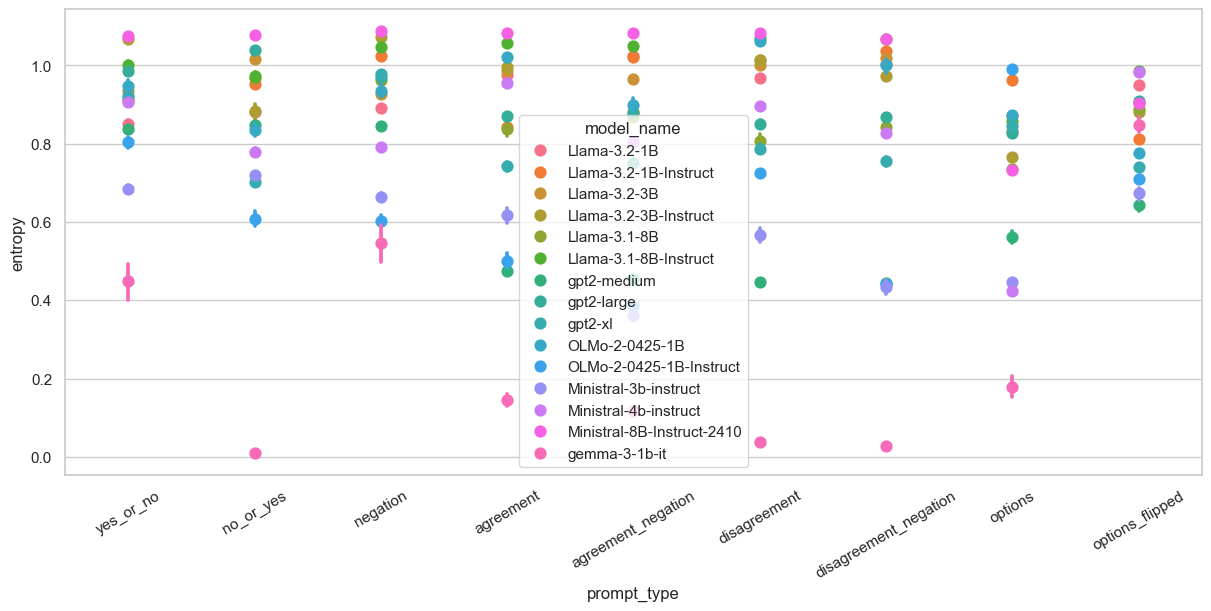

In [175]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
sns.pointplot(x='prompt_type', y='entropy', hue='model_name', data=combined_df, linestyle="None")

<Axes: xlabel='title', ylabel='entropy'>

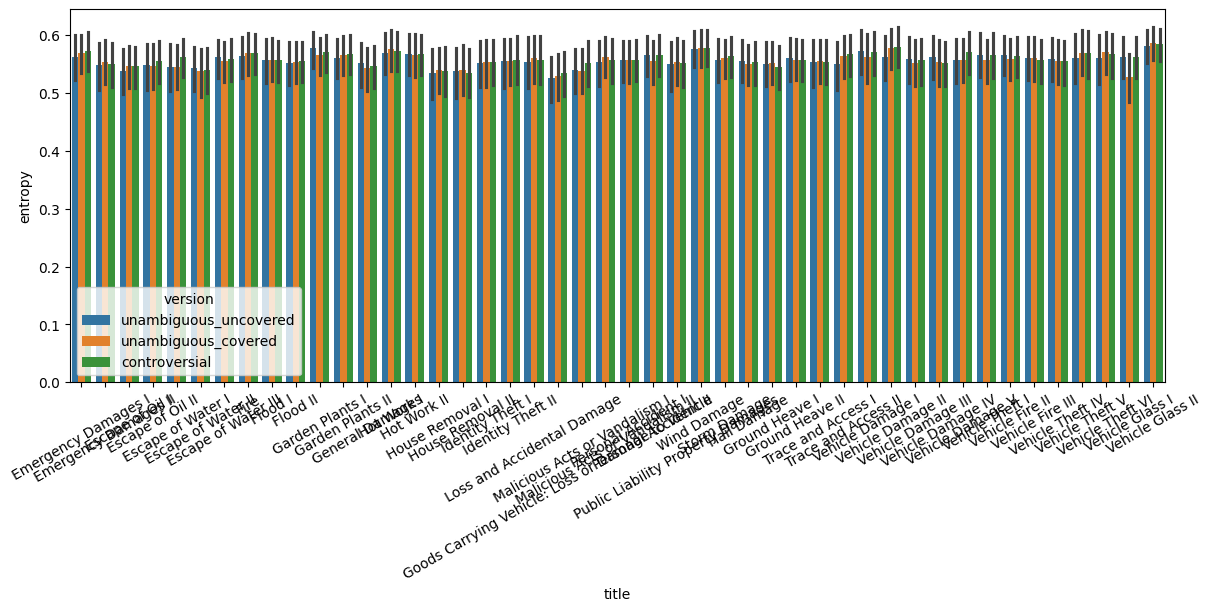

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12,6), layout='constrained')
plt.xticks(rotation=30)
sns.barplot(x='title', y='entropy', hue='version', data=combined_df)

# JSD Distance to reversal 

# Counts of Covered and Not Covered Answer - change in that